In [36]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.17.0
3.5.0


In [51]:
# import fashion data

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [52]:
print(X_train_full.shape)
print(Y_train_full.dtype)

(60000, 28, 28)
uint8


In [58]:
# create validation set
# Scale down pixel intensity by 255 for simplicity and convert to floats

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[:5000] / 255.0
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[:5000]
X_test = X_test / 522.0


(5000,)

In [40]:
# set clothing item class names

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

class_names[Y_train[0]]

'Ankle boot'

In [41]:
# build the neural network
# add 1st input layer which converts input miage to a 1D array
# add 2nd layer with 300 neurons & ReLU activation function
# add 3rd layer with 100 neurons & ReLU activation function
# add 4th output layer with 1 neuron per class. Softmax actiation function because the classes are exclusive

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


# params = shape[28 x 28] x connection weights [neurons] + bias terms [neurons]
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# get model layers
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [43]:
# info on layers
hidden1 = model.layers[1]
hidden1.name

'dense_12'

In [44]:
# get weights and biases
weights, biases = hidden1.get_weights()
#weights
#biases

In [45]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [60]:
# training
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_valid, Y_valid))

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4461 - loss: 1.7797 - val_accuracy: 0.7160 - val_loss: 0.9855
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.9326 - val_accuracy: 0.7660 - val_loss: 0.7626
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7763 - loss: 0.7376 - val_accuracy: 0.7428 - val_loss: 0.7358
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7851 - loss: 0.6797 - val_accuracy: 0.7900 - val_loss: 0.6290
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.6255 - val_accuracy: 0.8158 - val_loss: 0.5742
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8113 - loss: 0.5725 - val_accuracy: 0.7682 - val_loss: 0.6682
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.5633 - val_accuracy: 0.7972 - val_loss: 0.5909
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8315 - loss: 0.5148 - val_accuracy: 0.

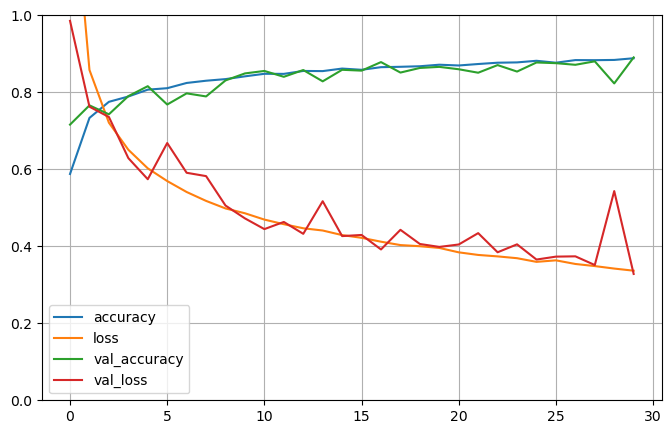

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()